In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import gdown


In [4]:


file_id = '1Pl9q58dqA8dV_JEOby8TPBw2GHZN1bhz'  # Replace with your file ID

# Generate the direct download URL
url = f'https://drive.google.com/uc?id={file_id}'

# Load the file directly into a pandas DataFrame
heart = pd.read_csv(gdown.download(url, quiet=False))
# heart = pd.read_csv(obj['Body'])


Downloading...
From (original): https://drive.google.com/uc?id=1Pl9q58dqA8dV_JEOby8TPBw2GHZN1bhz
From (redirected): https://drive.google.com/uc?id=1Pl9q58dqA8dV_JEOby8TPBw2GHZN1bhz&confirm=t&uuid=b43e6f3d-8105-440e-ba8d-bd5e910a1d06
To: c:\Users\akash\OneDrive - Lambton College\project\big data viz project 2\heart_2022_with_nans.csv
100%|██████████| 140M/140M [00:18<00:00, 7.53MB/s] 


In [5]:

heart.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
heart.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
len(heart)

445132

In [5]:
duplicated_rows = heart[heart.duplicated()]
len(duplicated_rows)

157

In [6]:
heart.drop_duplicates(inplace=True)

In [7]:
heart.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1193
PhysicalHealthDays           10922
MentalHealthDays              9062
LastCheckupTime               8301
PhysicalActivities            1088
SleepHours                    5448
RemovedTeeth                 11355
HadHeartAttack                3060
HadAngina                     4400
HadStroke                     1552
HadAsthma                     1768
HadSkinCancer                 3138
HadCOPD                       2214
HadDepressiveDisorder         2807
HadKidneyDisease              1921
HadArthritis                  2628
HadDiabetes                   1082
DeafOrHardOfHearing          20502
BlindOrVisionDifficulty      21419
DifficultyConcentrating      24095
DifficultyWalking            23867
DifficultyDressingBathing    23770
DifficultyErrands            25511
SmokerStatus                 35316
ECigaretteUsage              35514
ChestScan                    55900
RaceEthnicityCategor

In [8]:
for col in heart.columns:
    if heart[col].dtype == 'object':
        min_value = heart[col].dropna().mode().iloc[0]
        heart[col] = heart[col].fillna(min_value)
    else:
        mean_value = heart[col].mean()
        heart[col] = heart[col].fillna(mean_value)

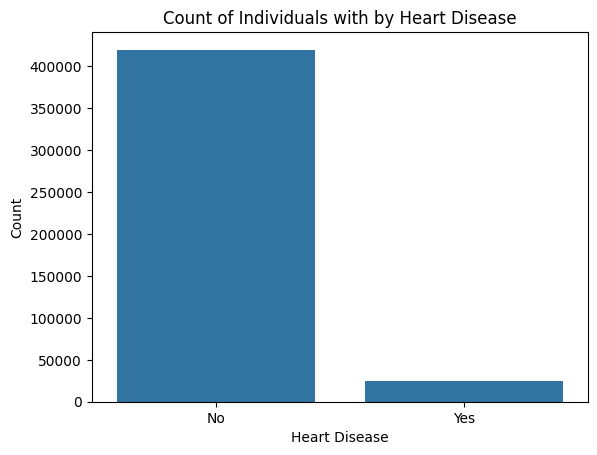

In [9]:
heart_count = heart['HadHeartAttack'].value_counts()

# Plot the data
sns.barplot(x=heart_count.index, y=heart_count.values)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Individuals with by Heart Disease')
plt.show()

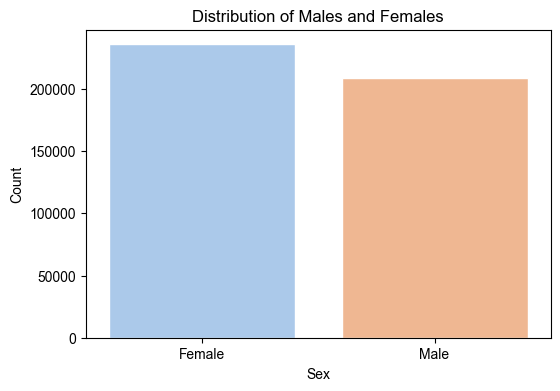

In [10]:
plt.figure(figsize=(6, 4))
plt.title('Distribution of Males and Females')
sns.set(style='whitegrid')
sns.countplot(x='Sex', data=heart, palette='pastel', hue='Sex', dodge=False, legend=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

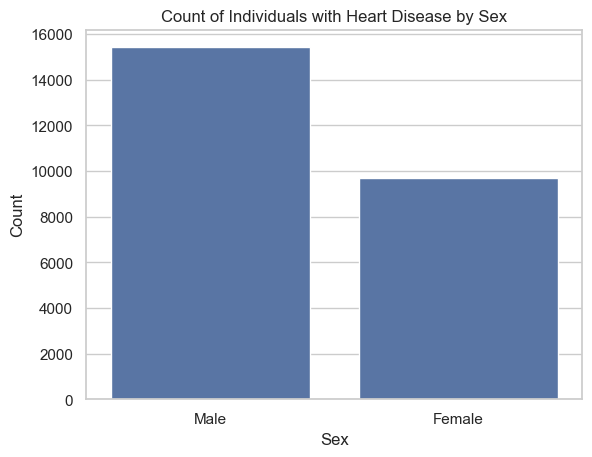

In [11]:
sex_heart_count = heart['Sex'][heart['HadHeartAttack'] == 'Yes'].value_counts()

# Plot the data
sns.barplot(x=sex_heart_count.index, y=sex_heart_count.values)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Individuals with Heart Disease by Sex')
plt.show()

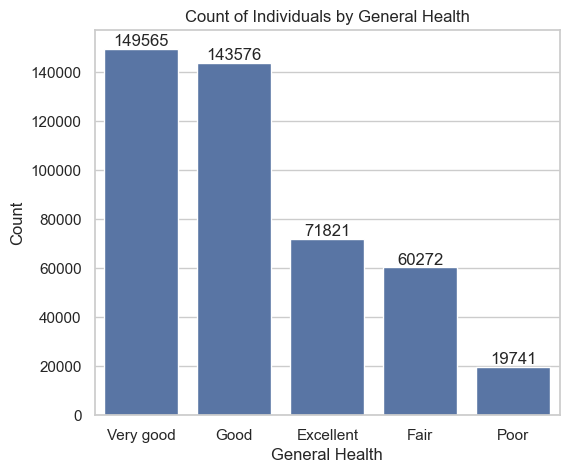

In [12]:
gh_heart_count = heart['GeneralHealth'].value_counts()

# Plot the data
plt.figure(figsize=(6, 5))
ax = sns.barplot(x=gh_heart_count.index, y=gh_heart_count.values)

# Annotate the bars with the count values
for i, v in enumerate(gh_heart_count.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

plt.xlabel('General Health')
plt.ylabel('Count')
plt.title('Count of Individuals by General Health')
plt.show()

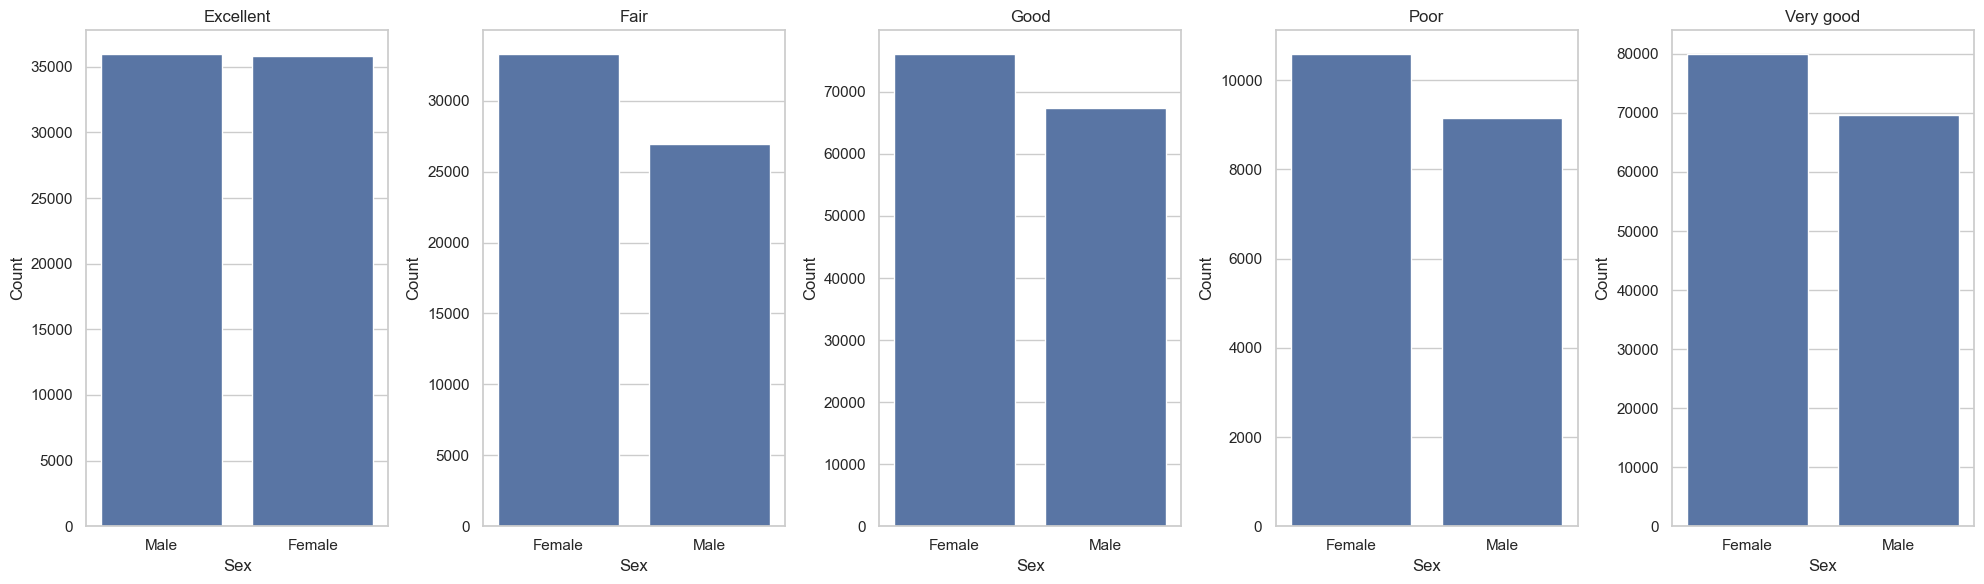

In [13]:
g_gh = heart.groupby('GeneralHealth')

fig, axes = plt.subplots(1, len(g_gh.groups), figsize=(20, 6))

# Plot each group
for i, (g, group) in enumerate(g_gh):
    x_counts = group['Sex'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

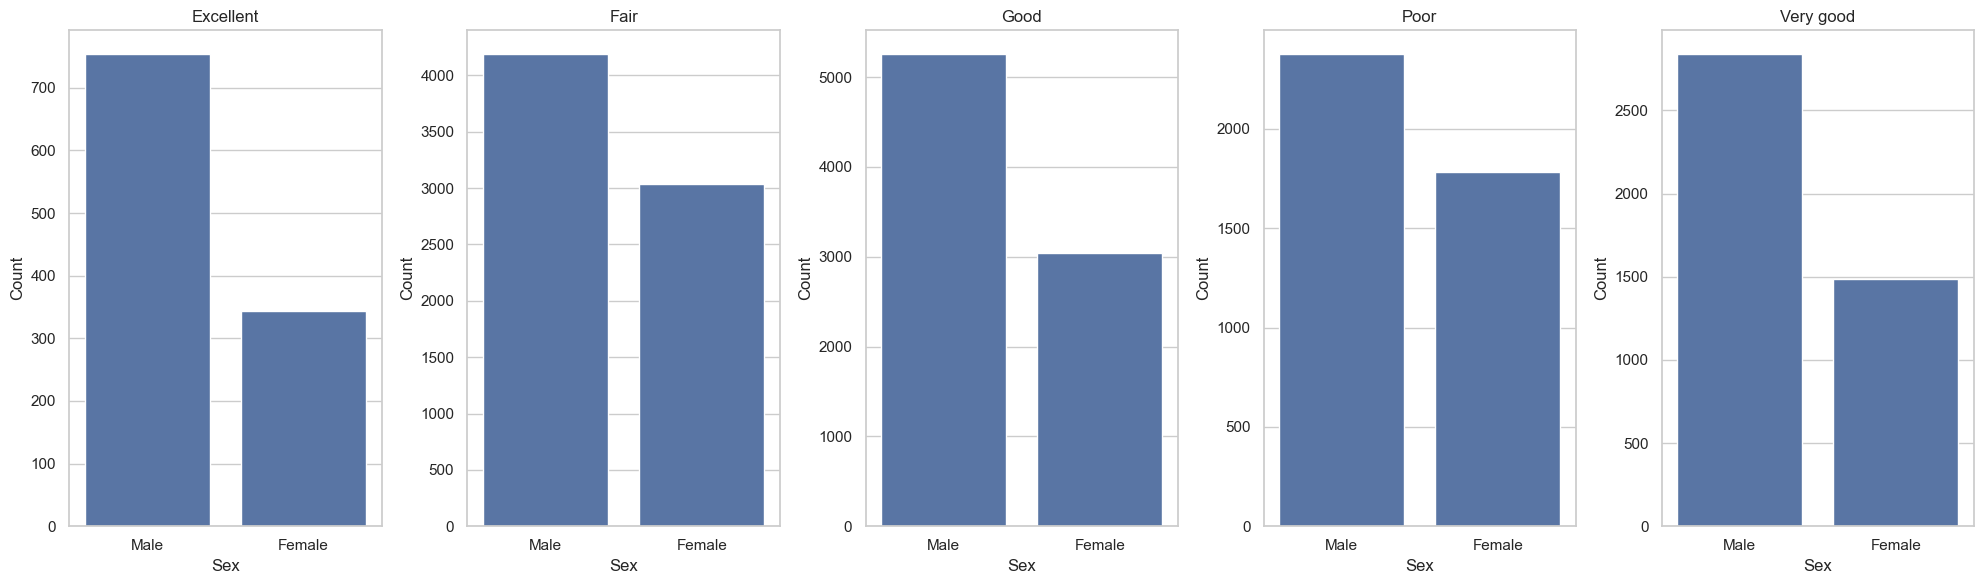

In [14]:
fig, axes = plt.subplots(1, len(g_gh.groups), figsize=(20, 6))

# Plot each group
for i, (g, group) in enumerate(g_gh):
    x_counts = group['Sex'][group['HadHeartAttack'] == 'Yes'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

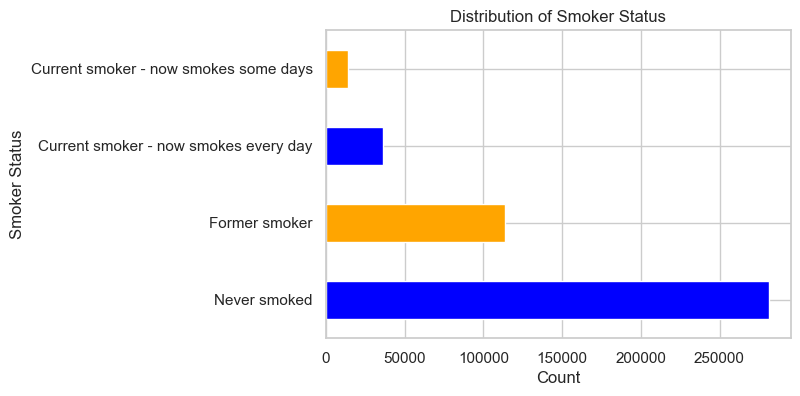

In [15]:
value_counts = heart['SmokerStatus'].value_counts()

plt.figure(figsize=(6, 4))
value_counts.plot(kind='barh', color=['blue', 'orange'])
plt.title('Distribution of Smoker Status')
plt.ylabel('Smoker Status')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

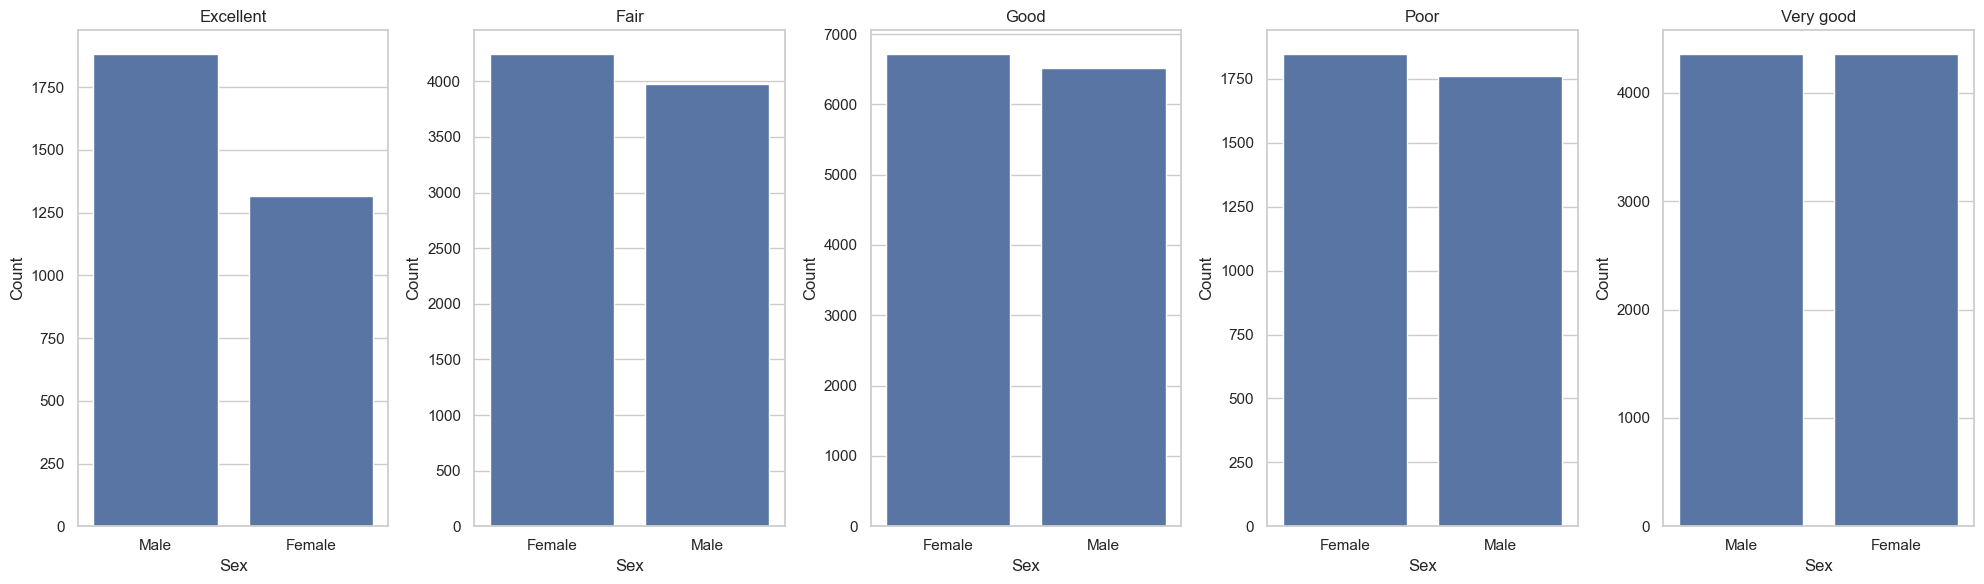

In [16]:

fig, axes = plt.subplots(1, len(g_gh.groups), figsize=(20, 6))

# Plot each group
for i, (g, group) in enumerate(g_gh):
    x_counts = group['Sex'][(group['HadHeartAttack'] == 'Yes') & (group['SmokerStatus'] == 'Current smoker - now smokes some days') | (group['SmokerStatus'] == 'Current smoker - now smokes every day')].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

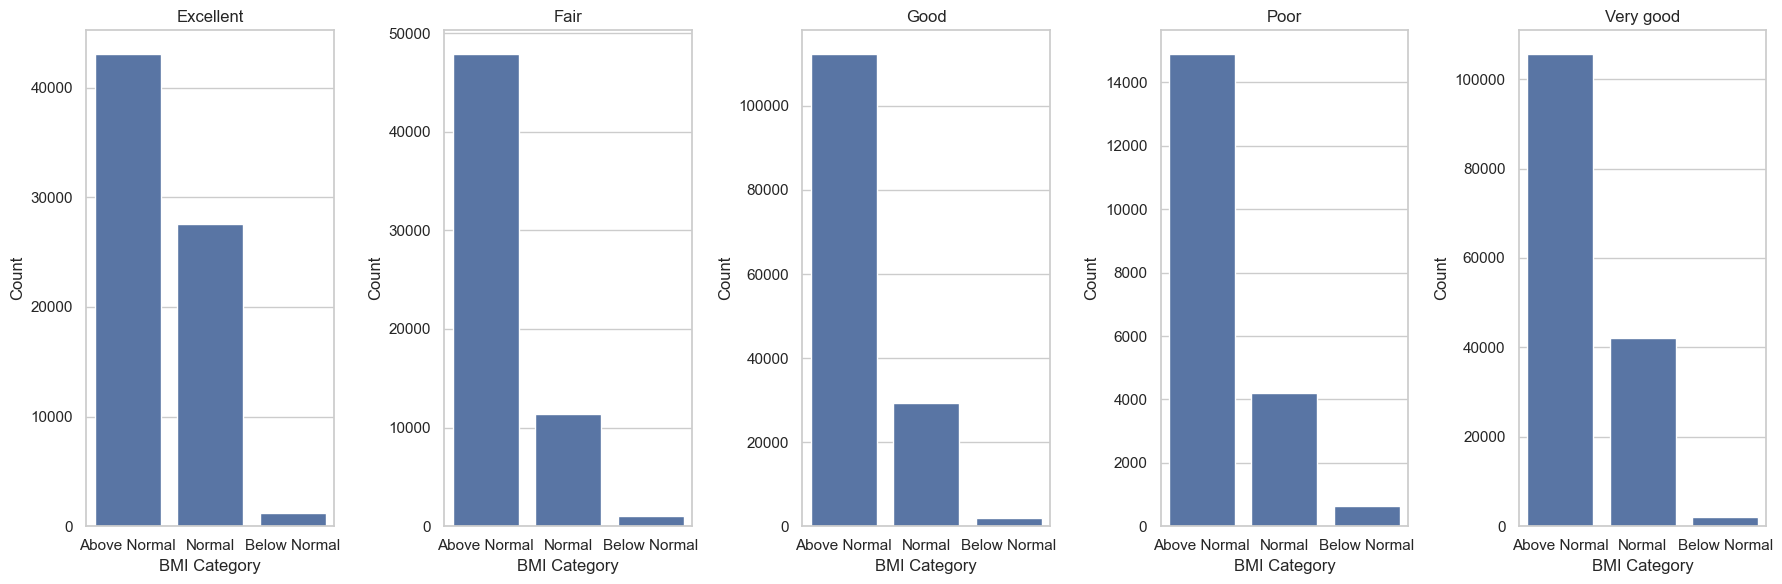

In [17]:
def bmi_category(bmi):
    if bmi > 24.9:
        return 'Above Normal'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'Normal'
    else:
        return 'Below Normal'

# Apply the function to create a new column 'bmi_category'
heart['bmi_category'] = heart['BMI'].apply(bmi_category)

# Create subplots for BMI categories
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['bmi_category'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('BMI Category')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')


plt.tight_layout()
plt.show()

# Remove the 'bmi_category' column to revert to the original state
heart.drop(columns='bmi_category', inplace=True)

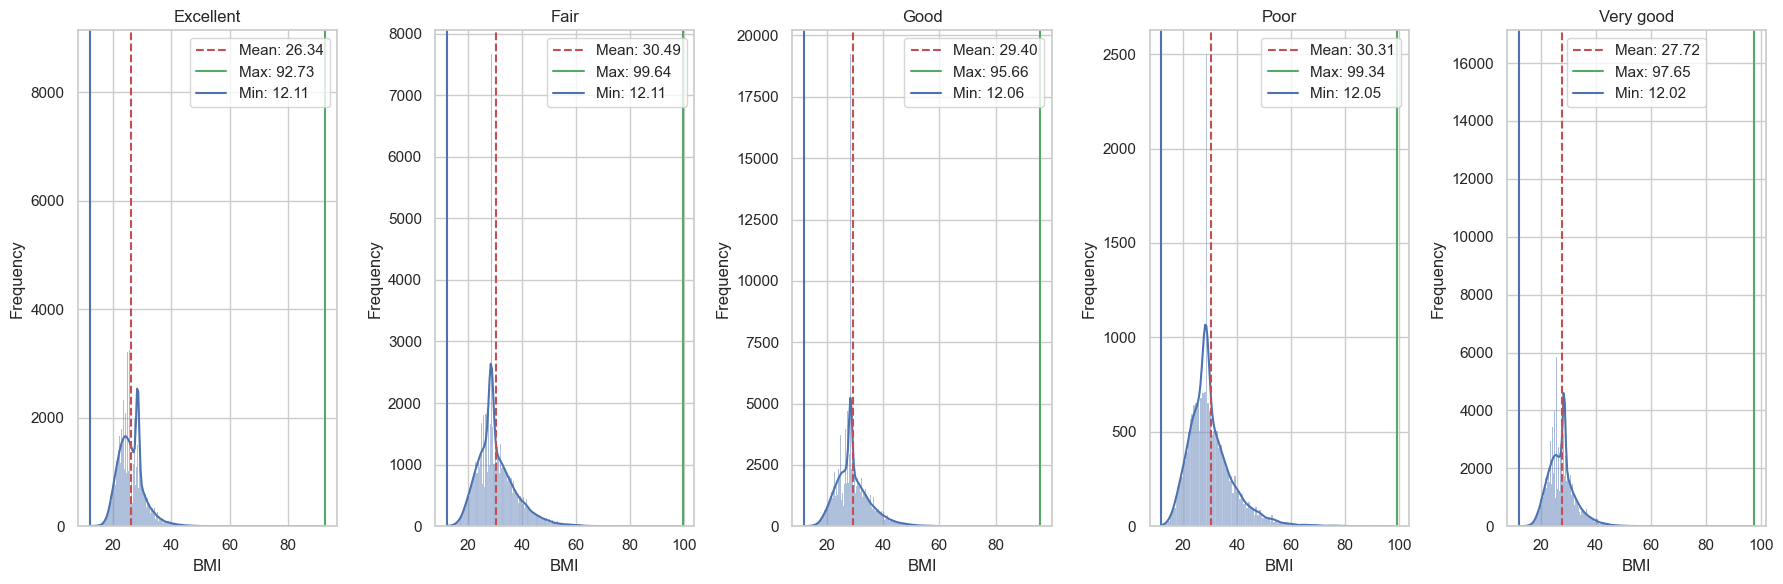

In [18]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x = group['BMI']
    
    # Plot the data
    sns.histplot(x, kde=True, ax=axes[i])
    axes[i].axvline(x.mean(), color='r', linestyle='--', label=f'Mean: {x.mean():.2f}')
    axes[i].axvline(x.max(), color='g', linestyle='-', label=f'Max: {x.max():.2f}')
    axes[i].axvline(x.min(), color='b', linestyle='-', label=f'Min: {x.min():.2f}')
    axes[i].set_xlabel('BMI')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{g}')
    axes[i].legend()

plt.tight_layout()
plt.show()

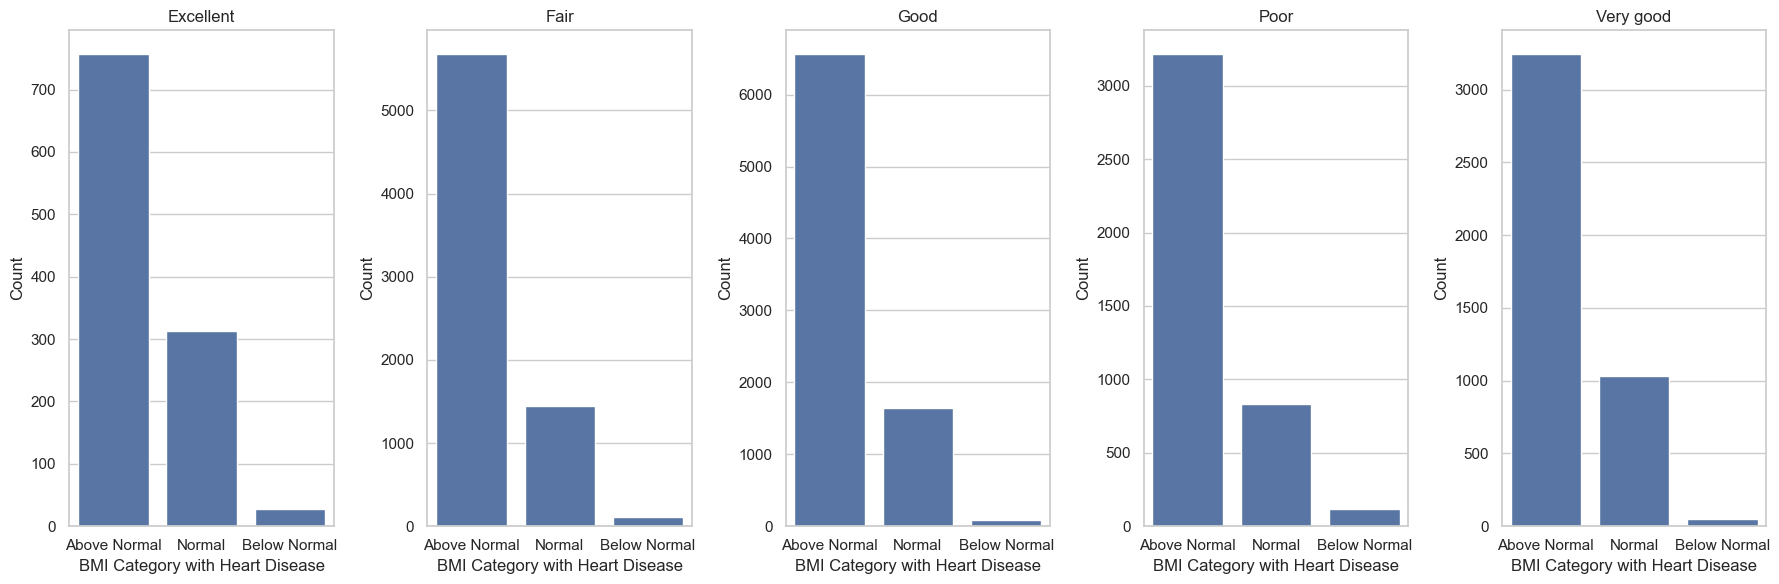

In [19]:
heart['bmi_category'] = heart['BMI'].apply(bmi_category)

# Create subplots for BMI categories
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['bmi_category'][group['HadHeartAttack'] == 'Yes'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('BMI Category with Heart Disease')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')


plt.tight_layout()
plt.show()

# Remove the 'bmi_category' column to revert to the original state
heart.drop(columns='bmi_category', inplace=True)

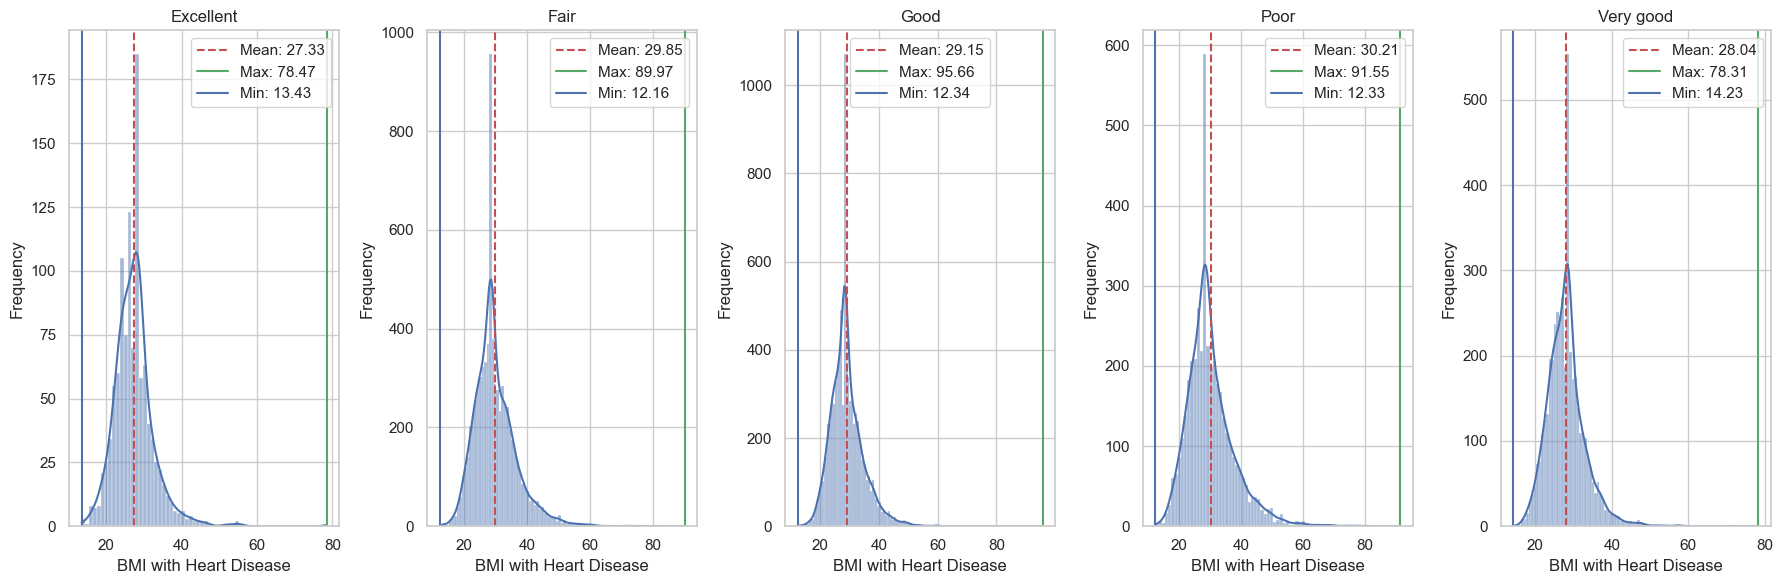

In [20]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x = group['BMI'][group['HadHeartAttack'] == 'Yes']
    
    # Plot the data
    sns.histplot(x, kde=True, ax=axes[i])
    axes[i].axvline(x.mean(), color='r', linestyle='--', label=f'Mean: {x.mean():.2f}')
    axes[i].axvline(x.max(), color='g', linestyle='-', label=f'Max: {x.max():.2f}')
    axes[i].axvline(x.min(), color='b', linestyle='-', label=f'Min: {x.min():.2f}')
    axes[i].set_xlabel('BMI with Heart Disease')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{g}')
    axes[i].legend()

plt.tight_layout()
plt.show()

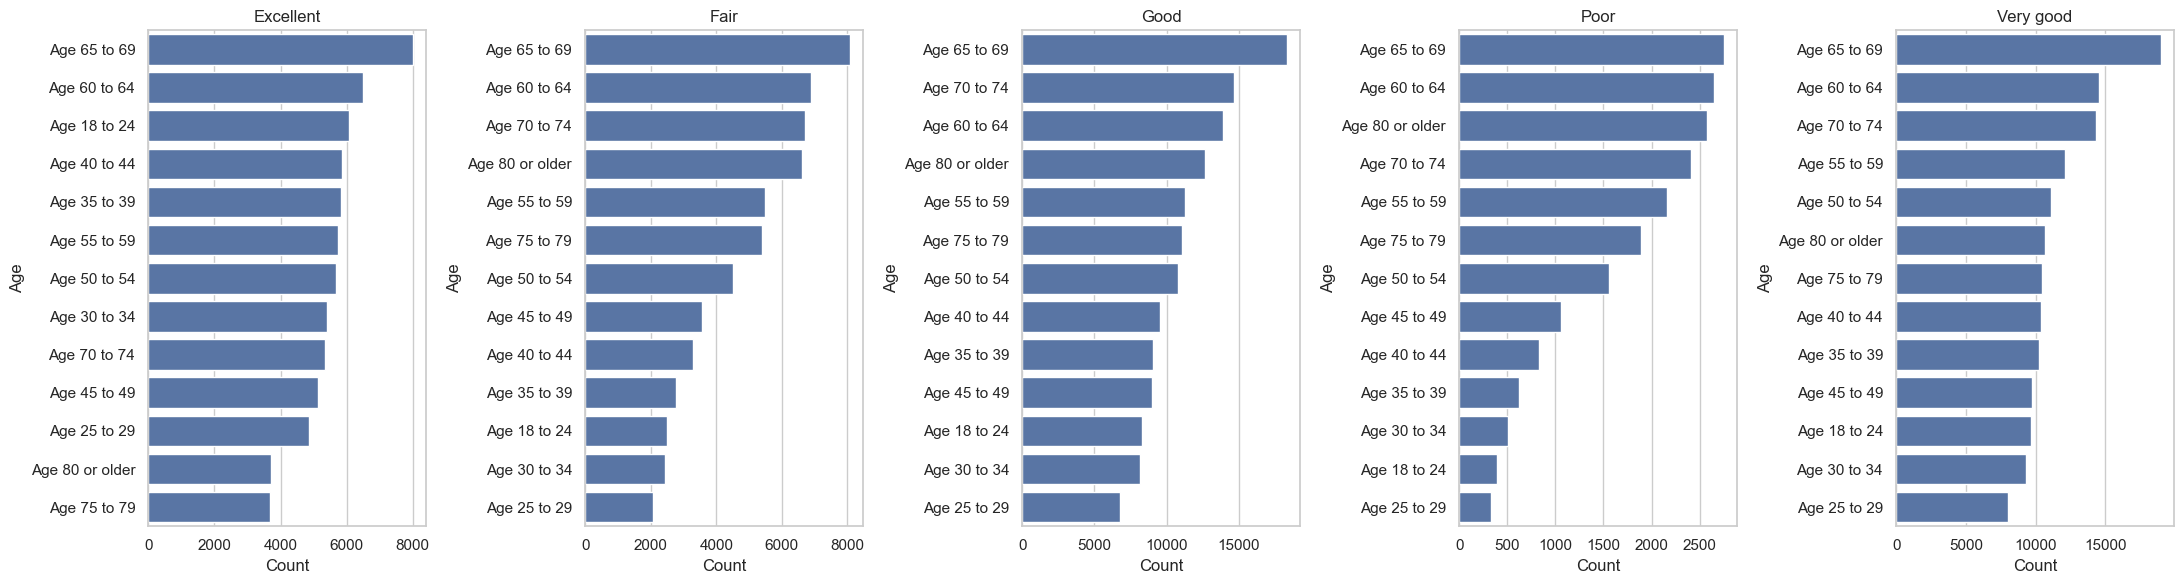

In [21]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['AgeCategory'].value_counts()
    
    # Plot the data
    sns.barplot(y=x_counts.index, x=x_counts.values, ax=axes[i] , orient='h')
    axes[i].set_ylabel('Age')
    axes[i].set_xlabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

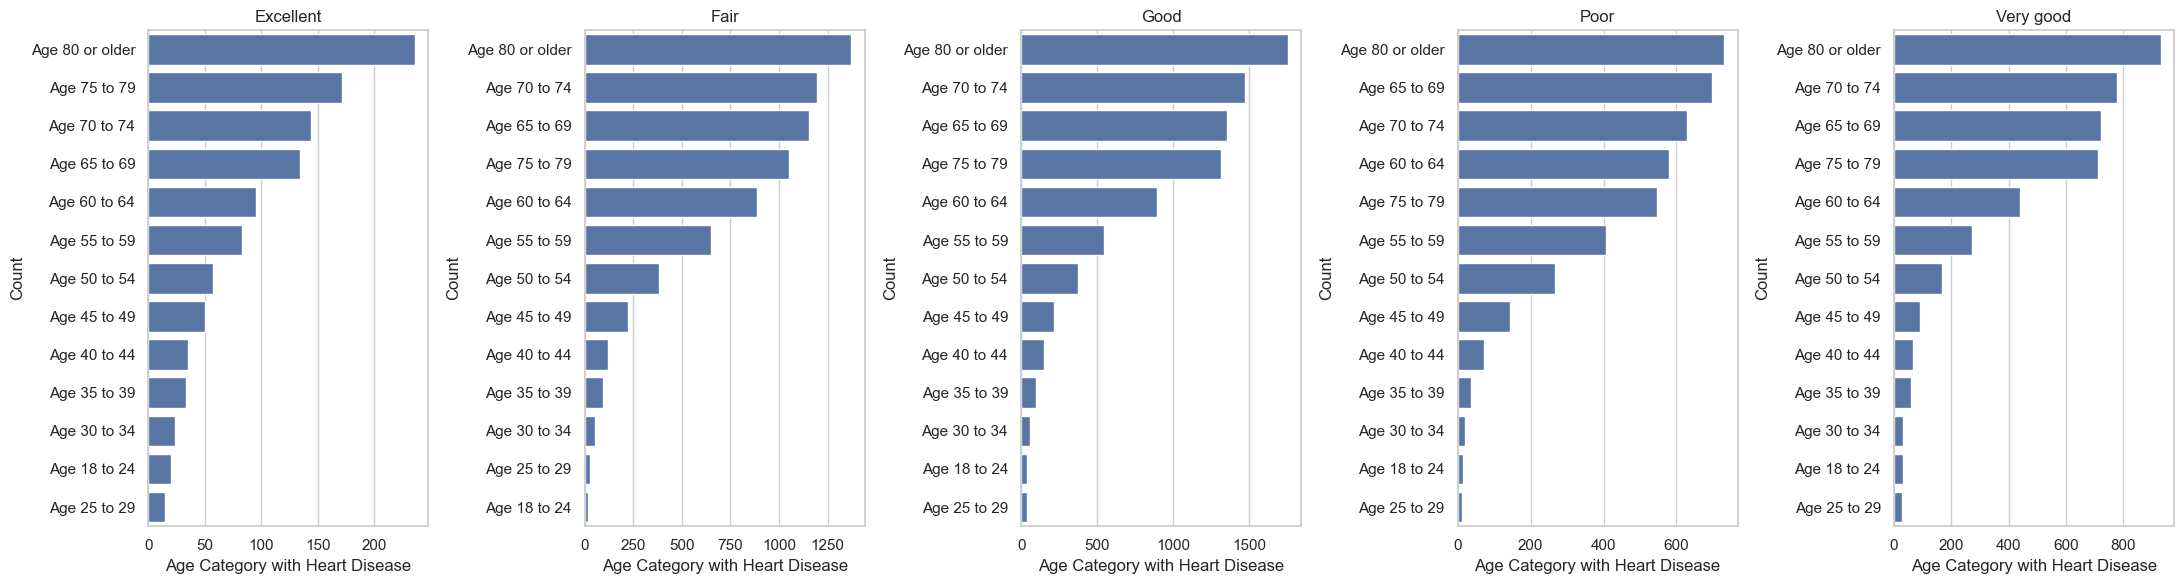

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['AgeCategory'][group['HadHeartAttack'] == 'Yes'].value_counts()
    
    # Plot the data
    sns.barplot(y=x_counts.index, x=x_counts.values, ax=axes[i] , orient='h')
    axes[i].set_xlabel('Age Category with Heart Disease')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'{g}')
    
plt.tight_layout()
plt.show()

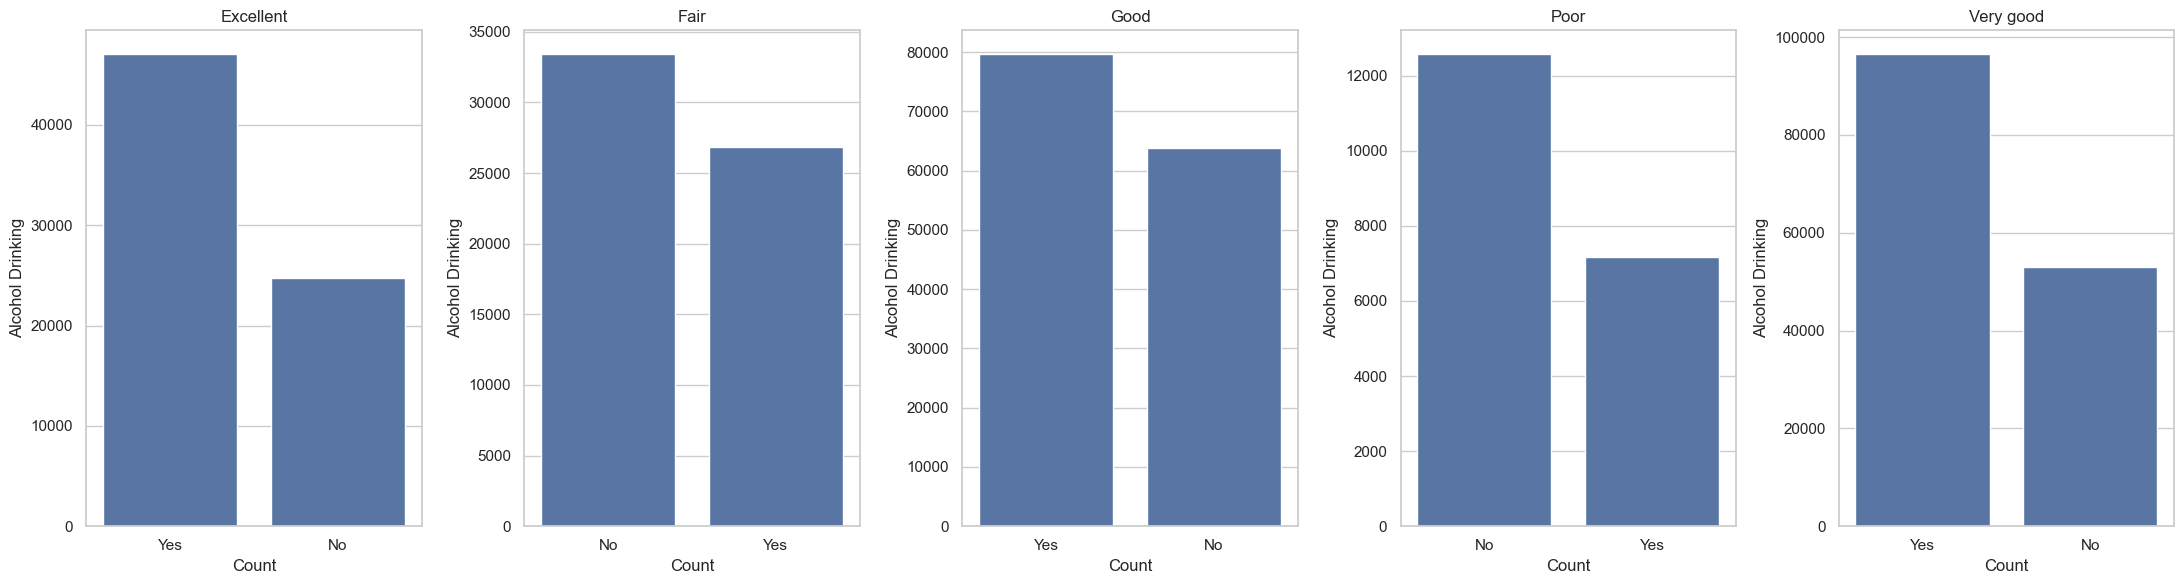

In [23]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x_counts = group['AlcoholDrinkers'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_ylabel('Alcohol Drinking')
    axes[i].set_xlabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

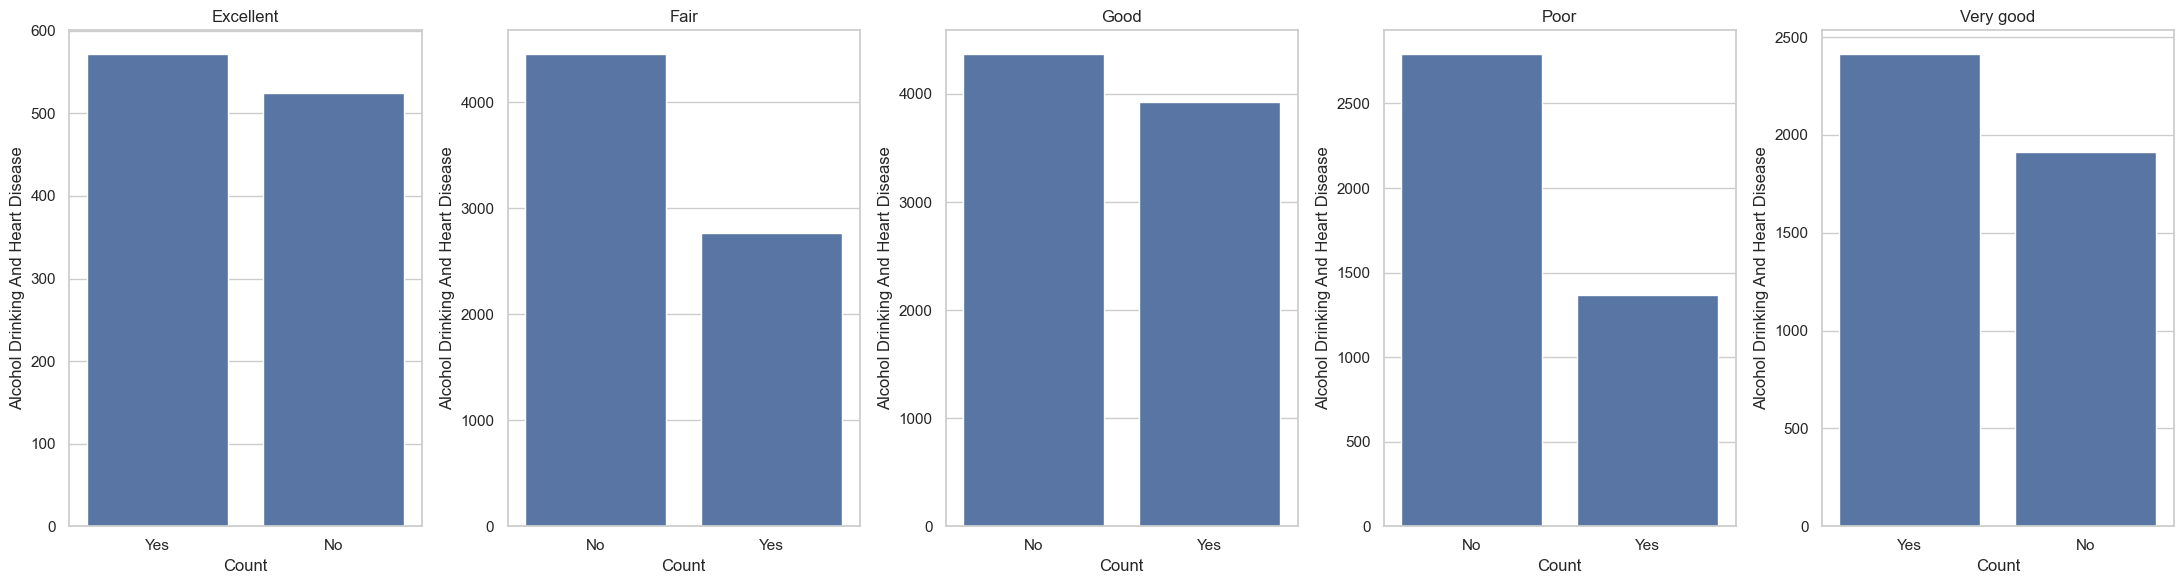

In [24]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x_counts = group['AlcoholDrinkers'][heart['HadHeartAttack'] == 'Yes'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_ylabel('Alcohol Drinking And Heart Disease')
    axes[i].set_xlabel('Count')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

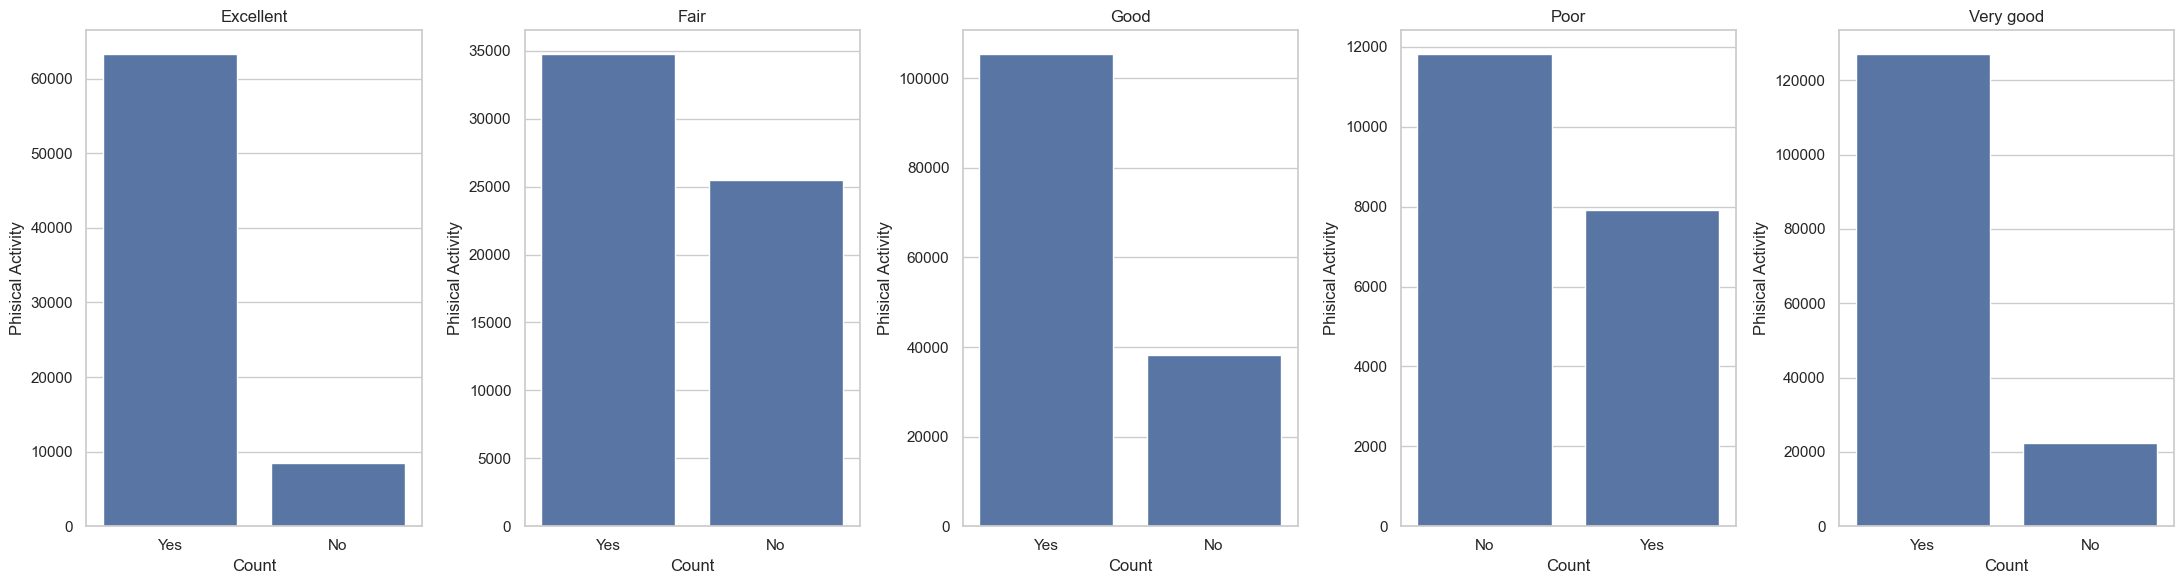

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['PhysicalActivities'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Phisical Activity')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

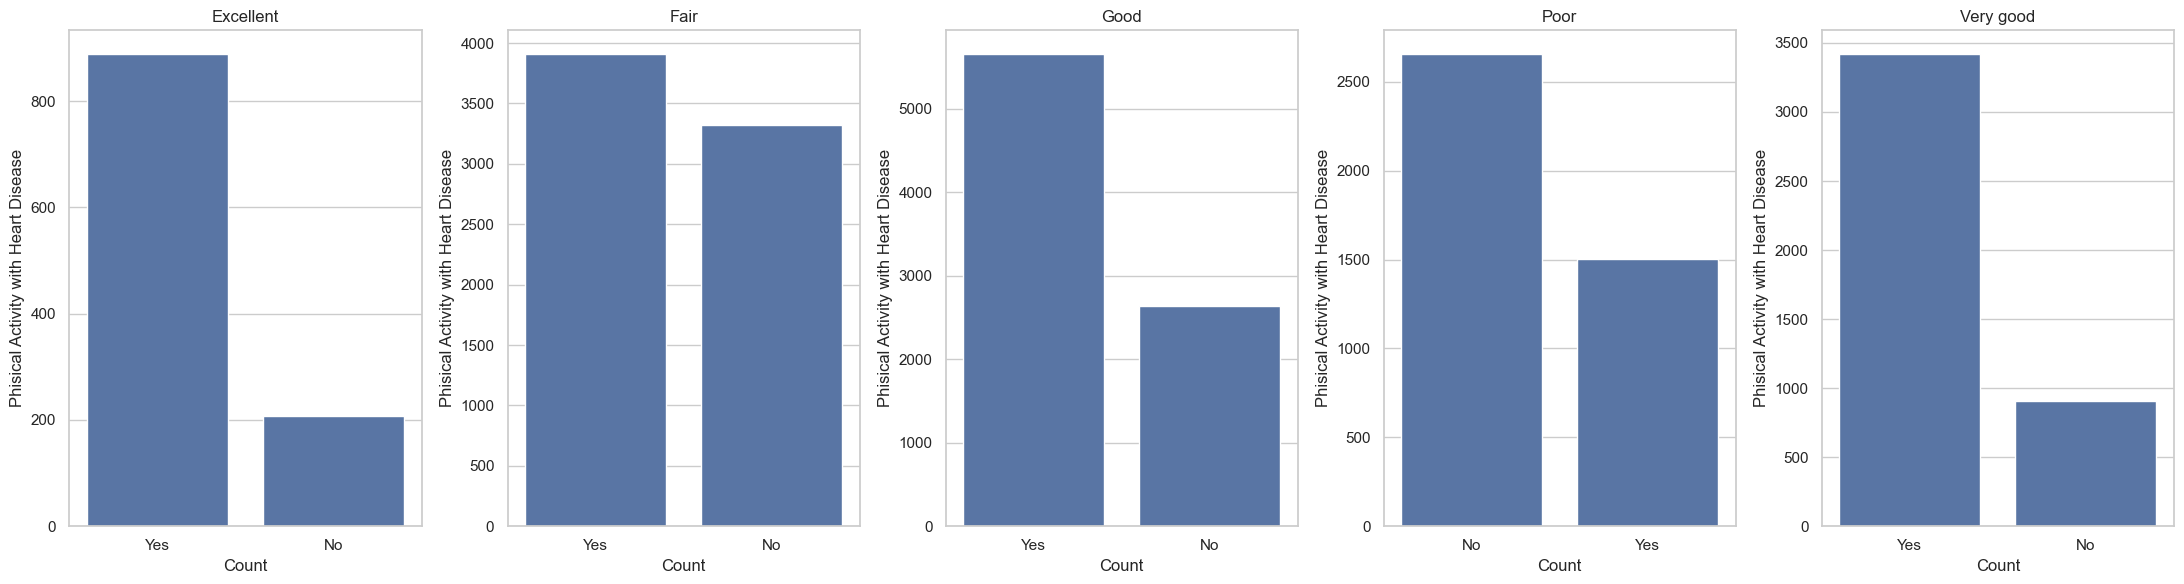

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(22, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    x_counts = group['PhysicalActivities'][group['HadHeartAttack'] == 'Yes'].value_counts()
    
    # Plot the data
    sns.barplot(x=x_counts.index, y=x_counts.values, ax=axes[i])
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Phisical Activity with Heart Disease')
    axes[i].set_title(f'{g}')

plt.tight_layout()
plt.show()

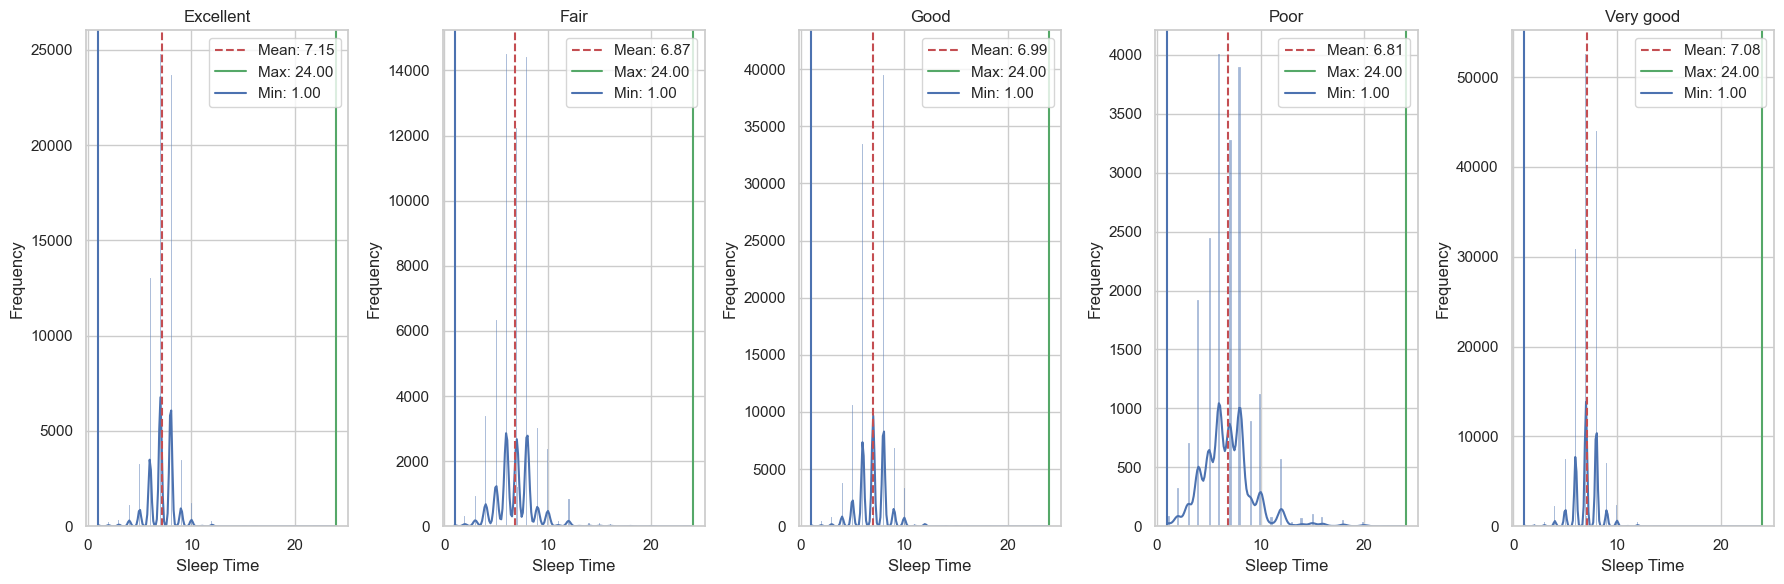

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x = group['SleepHours']
    
    # Plot the data
    sns.histplot(x, kde=True, ax=axes[i])
    axes[i].axvline(x.mean(), color='r', linestyle='--', label=f'Mean: {x.mean():.2f}')
    axes[i].axvline(x.max(), color='g', linestyle='-', label=f'Max: {x.max():.2f}')
    axes[i].axvline(x.min(), color='b', linestyle='-', label=f'Min: {x.min():.2f}')
    axes[i].set_xlabel('Sleep Time')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{g}')
    axes[i].legend()

plt.tight_layout()
plt.show()

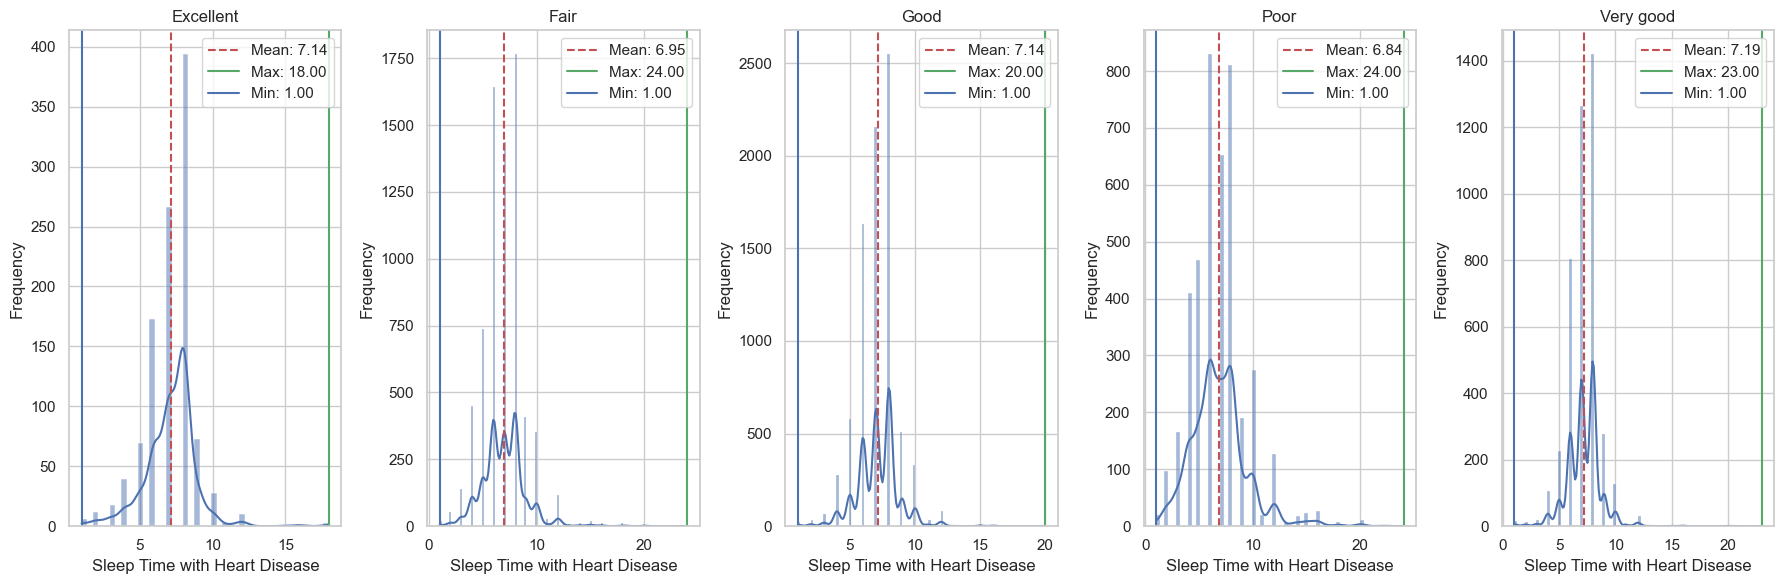

In [28]:
fig, axes = plt.subplots(1, 5, figsize=(18, 6))  # Adjusted figure size

for i, (g, group) in enumerate(g_gh):
    
    x = group['SleepHours'][group['HadHeartAttack'] == 'Yes']
    
    # Plot the data
    sns.histplot(x, kde=True, ax=axes[i])
    axes[i].axvline(x.mean(), color='r', linestyle='--', label=f'Mean: {x.mean():.2f}')
    axes[i].axvline(x.max(), color='g', linestyle='-', label=f'Max: {x.max():.2f}')
    axes[i].axvline(x.min(), color='b', linestyle='-', label=f'Min: {x.min():.2f}')
    axes[i].set_xlabel('Sleep Time with Heart Disease')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{g}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [29]:
for col in heart.select_dtypes(include='object').columns:
    encoder = LabelEncoder()
    heart[col] = encoder.fit_transform(heart[col])

In [31]:
correlation_matrix = heart.corr()
strong_correlation_cols = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['HadHeartAttack', col]) >= 0.06 and col != 'HadHeartAttack' and col != 'AgeCategory' and col != 'LastCheckupTime']

# Select features (X) and target (y)
X = heart[strong_correlation_cols]
y = heart['HadHeartAttack']

strong_correlation_cols

['Sex',
 'PhysicalHealthDays',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadAngina',
 'HadStroke',
 'HadCOPD',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ChestScan',
 'AlcoholDrinkers',
 'PneumoVaxEver']

In [32]:
s = MinMaxScaler()
X = s.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
under_sampler = RandomUnderSampler(random_state=42)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [35]:
models = {
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC()
}

param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
     'DecisionTree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'SVC': {
        'C': [0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    }
}

Optimizing KNN...
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
Best Score for KNN: 0.7647615245660206
Test Accuracy for KNN: 0.8207090285971121

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     83973
           1       0.20      0.71      0.31      5022

    accuracy                           0.82     88995
   macro avg       0.59      0.77      0.60     88995
weighted avg       0.94      0.82      0.86     88995

Confusion Matrix for KNN:
[[69452 14521]
 [ 1435  3587]]


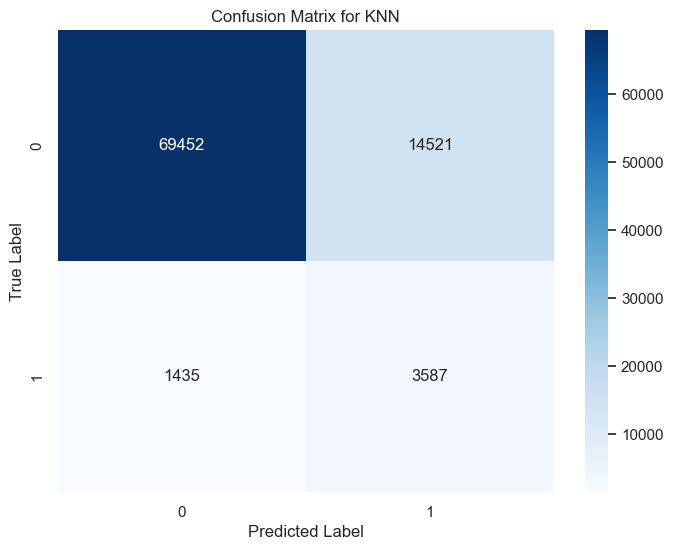

Optimizing RandomForest...
Best Parameters for RandomForest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best Score for RandomForest: 0.7914966092303107
Test Accuracy for RandomForest: 0.8221585482330468

Classification Report for RandomForest:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     83973
           1       0.21      0.75      0.32      5022

    accuracy                           0.82     88995
   macro avg       0.59      0.79      0.61     88995
weighted avg       0.94      0.82      0.87     88995

Confusion Matrix for RandomForest:
[[69394 14579]
 [ 1248  3774]]


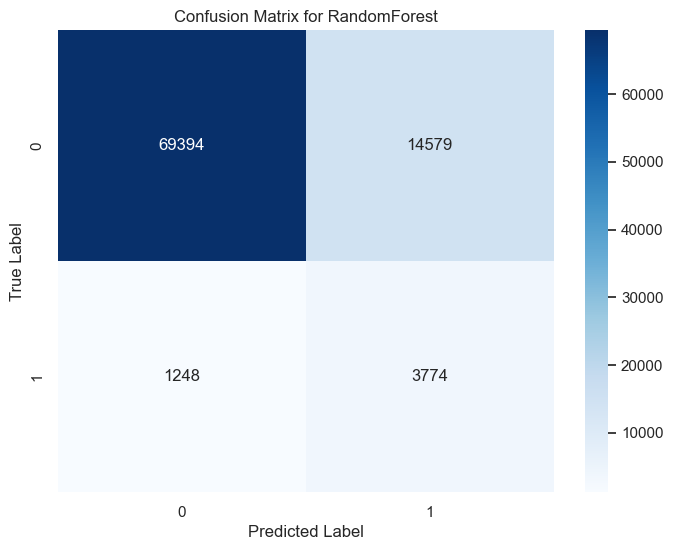

Optimizing DecisionTree...
Best Parameters for DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
Best Score for DecisionTree: 0.7764114306357286
Test Accuracy for DecisionTree: 0.8203157480757346

Classification Report for DecisionTree:

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     83973
           1       0.20      0.73      0.31      5022

    accuracy                           0.82     88995
   macro avg       0.59      0.78      0.60     88995
weighted avg       0.94      0.82      0.86     88995

Confusion Matrix for DecisionTree:
[[69355 14618]
 [ 1373  3649]]


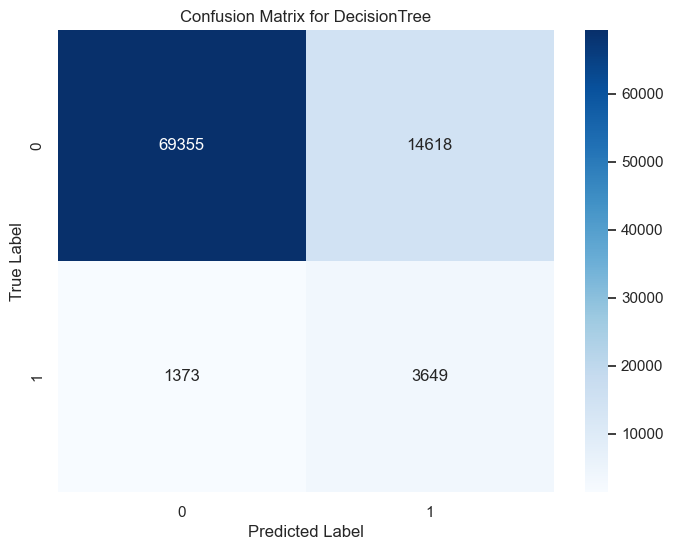

Optimizing LogisticRegression...
Best Parameters for LogisticRegression: {'C': 0.1, 'solver': 'liblinear'}
Best Score for LogisticRegression: 0.7855969286723089
Test Accuracy for LogisticRegression: 0.8440811281532671

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.98      0.85      0.91     83973
           1       0.22      0.71      0.34      5022

    accuracy                           0.84     88995
   macro avg       0.60      0.78      0.63     88995
weighted avg       0.94      0.84      0.88     88995

Confusion Matrix for LogisticRegression:
[[71535 12438]
 [ 1438  3584]]


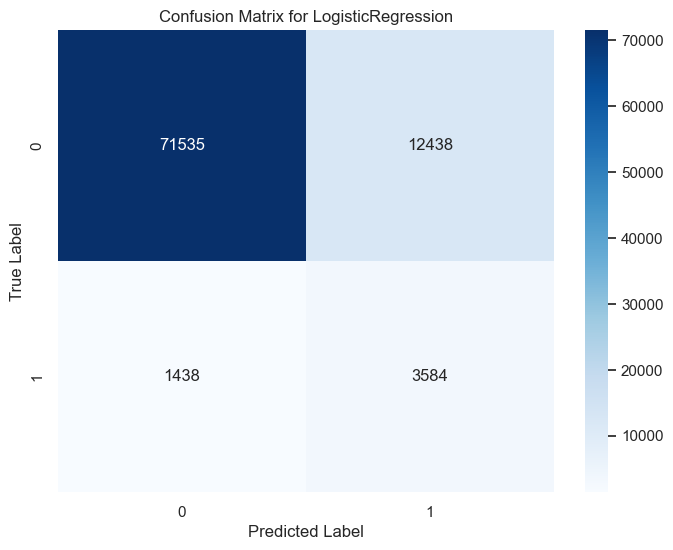

Optimizing SVC...
Best Parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best Score for SVC: 0.7867419813025507
Test Accuracy for SVC: 0.8343839541547278

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.98      0.84      0.91     83973
           1       0.21      0.73      0.33      5022

    accuracy                           0.83     88995
   macro avg       0.60      0.78      0.62     88995
weighted avg       0.94      0.83      0.87     88995

Confusion Matrix for SVC:
[[70595 13378]
 [ 1361  3661]]


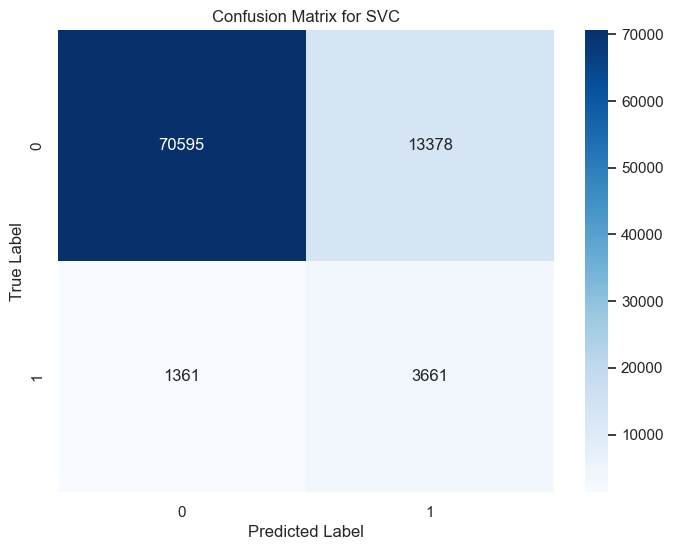

In [36]:
best_models = {}
best_scores = {}

for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_}")

    y_pred = grid_search.best_estimator_.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy for {model_name}: {test_accuracy}\n")

    # Classification Report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {model_name}:\n{conf_matrix}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    class_labels = sorted(set(y_test)) 
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
